# Clustering Project
## Applying KMeans, Hierarchical Clustering, and DBSCAN to Multi-Blob, Iris, and Customer Datasets

In [15]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1. Multi-Blob Dataset

In [17]:
# Generate synthetic data
centers = [(-3, -3), (0, 0), (5, 2.5), (-1, 4), (4, 6), (9, 7)]
X_blob, y_blob = make_blobs(
    n_samples=[100, 150, 300, 400, 300, 200],
    n_features=2,
    cluster_std=[1.3, 0.6, 1.2, 1.7, 0.9, 1.7],
    centers=centers,
    shuffle=False,
    random_state=42)

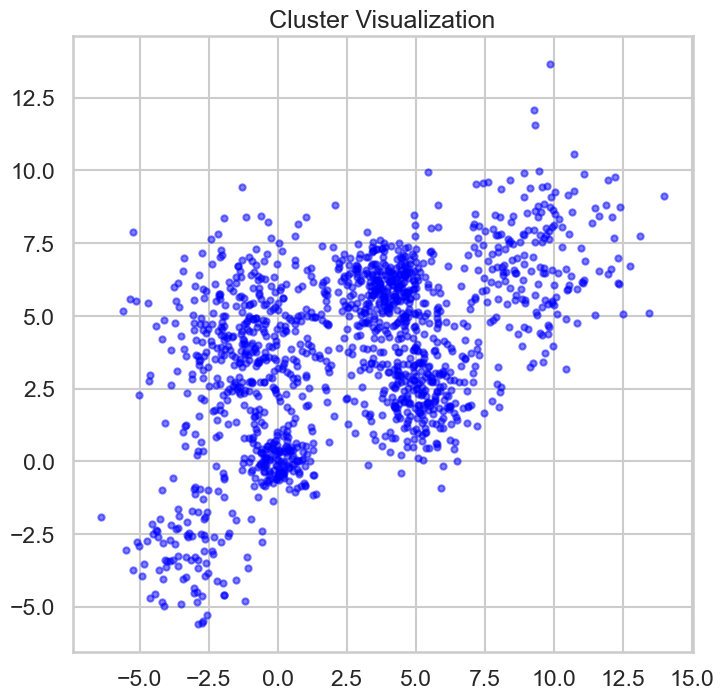

In [51]:
# Define visualization function
def display_cluster(X, km=None, num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1],
                        c=color[i], alpha=alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1],
                        c=color[i], marker='x', s=100)
    plt.title("Cluster Visualization")
    plt.show()

plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")
sns.set_context("talk")

# Plot generated blob dataset
display_cluster(X_blob)

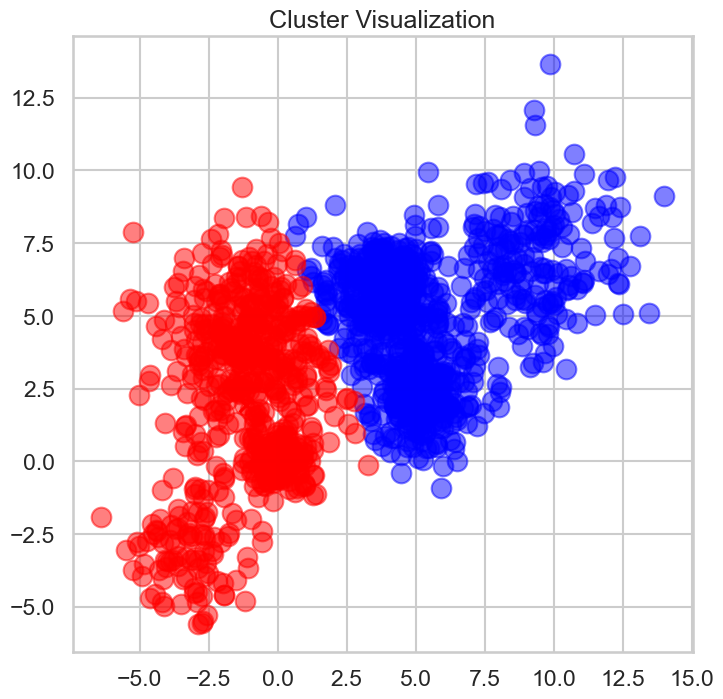

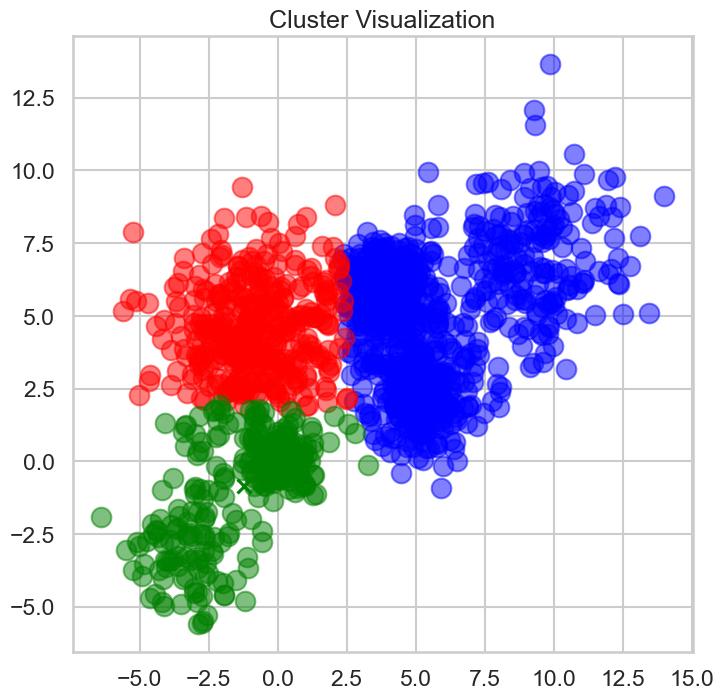

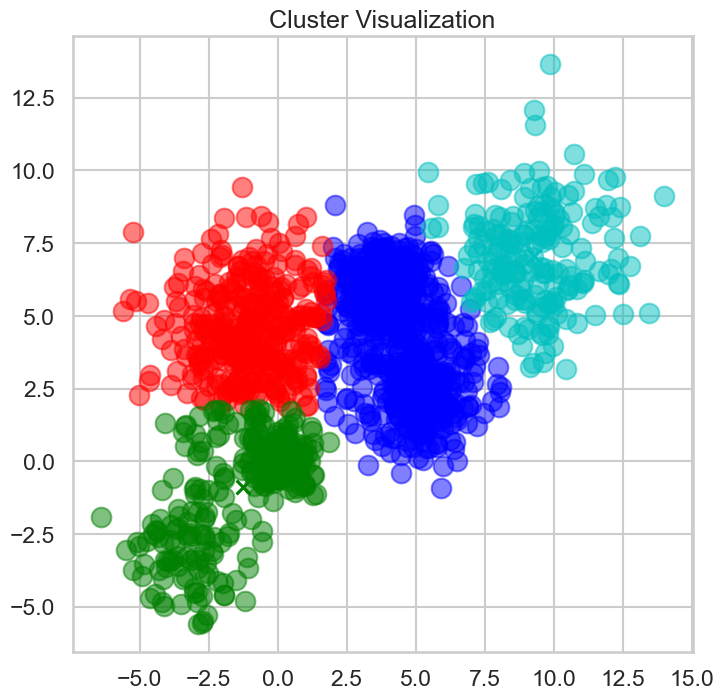

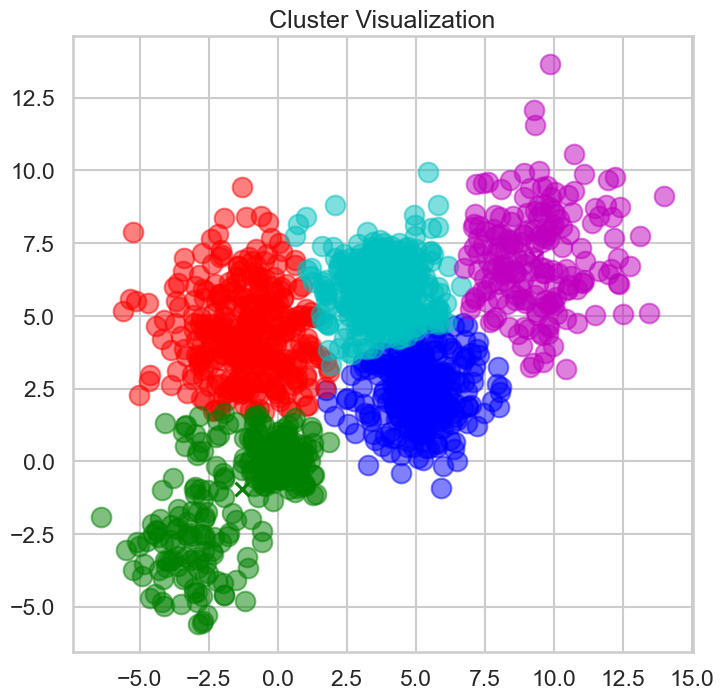

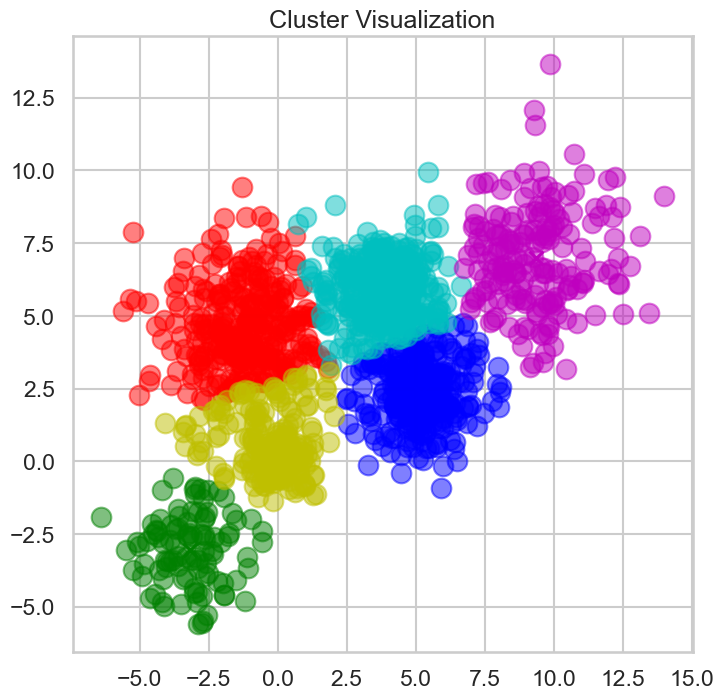

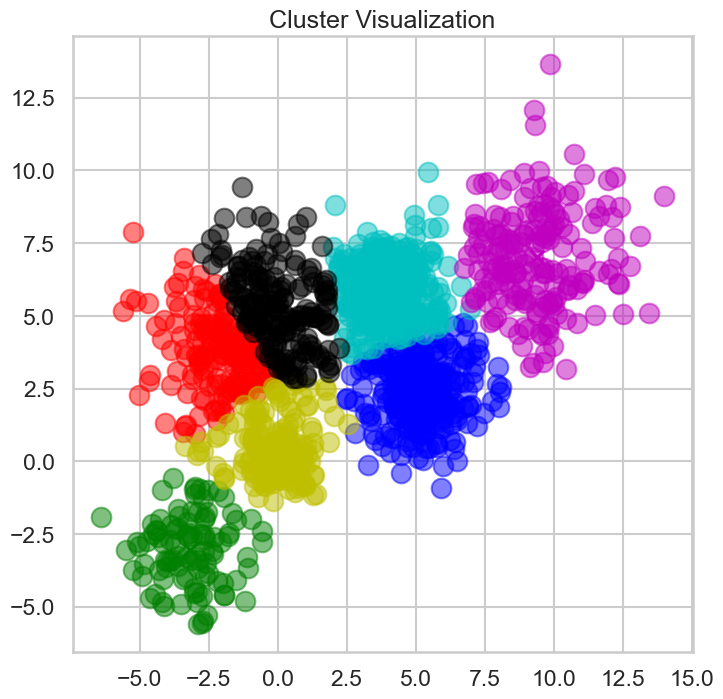

IndexError: string index out of range

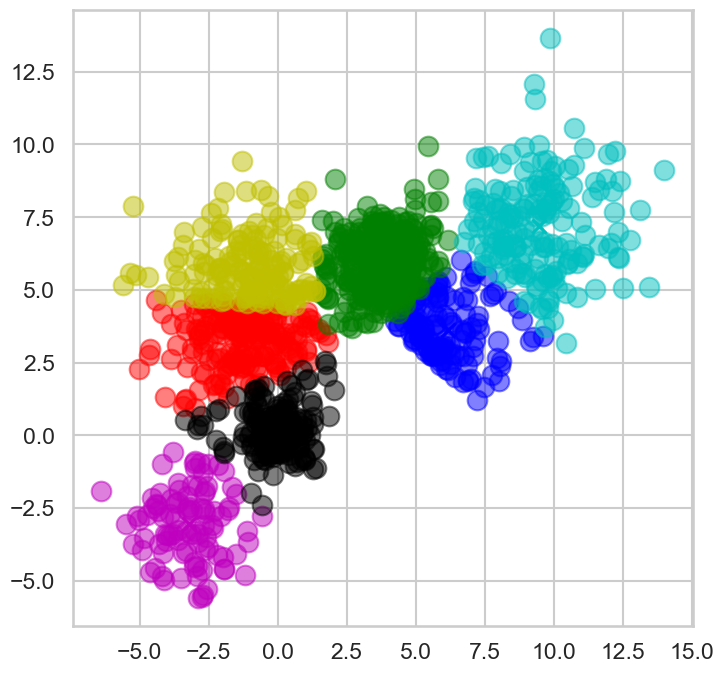

In [43]:
# Apply KMeans on Multi-Blob data
inertias = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_blob)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(X_blob, kmeans.labels_)
    silhouette_scores.append(score)
    display_cluster(X_blob, kmeans, k)

# Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Distortion")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

# Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

Linkage: ward, Metric: euclidean, Silhouette Score: 0.4687


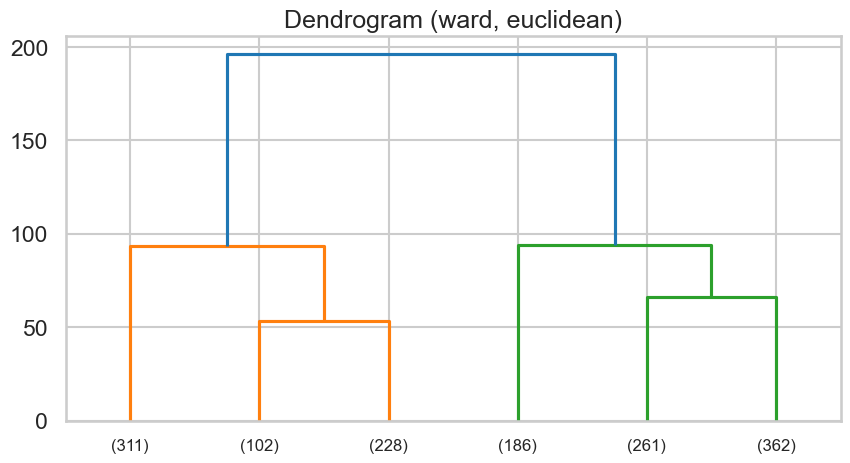

Linkage: complete, Metric: euclidean, Silhouette Score: 0.3819
Linkage: complete, Metric: manhattan, Silhouette Score: 0.3370
Linkage: complete, Metric: cosine, Silhouette Score: 0.1885
Linkage: average, Metric: euclidean, Silhouette Score: 0.4148
Linkage: average, Metric: manhattan, Silhouette Score: 0.3803
Linkage: average, Metric: cosine, Silhouette Score: 0.2036
Best Hierarchical Params (Multi-Blob): {'linkage': 'ward', 'Metric': 'euclidean'}
Best Silhouette Score (Multi-Blob): 0.4686938472105883


In [23]:
# Hierarchical Clustering
linkages = ['ward', 'complete', 'average']
affinities = ['euclidean', 'manhattan', 'cosine']
best_silhouette_hc = -1
best_params_hc = {}

for link in linkages:
    for metric in affinities:
        try:
            model = AgglomerativeClustering(n_clusters=6, linkage=link, metric=metric)
            labels = model.fit_predict(X_blob)
            score = silhouette_score(X_blob, labels)
            print(f"Linkage: {link}, Metric: {metric}, Silhouette Score: {score:.4f}")
            
            if score > best_silhouette_hc:
                best_silhouette_hc = score
                best_params_hc = {'linkage': link, 'Metric': metric}
            
            # Plot dendrogram for one trial
            if link == 'ward' and aff == 'euclidean':
                from scipy.cluster.hierarchy import dendrogram, linkage
                Z = linkage(X_blob, method=link, metric='euclidean')
                plt.figure(figsize=(10, 5))
                dendrogram(Z, truncate_mode='lastp', p=6)
                plt.title(f"Dendrogram ({link}, {aff})")
                plt.show()
        except ValueError:
            continue

print("Best Hierarchical Params (Multi-Blob):", best_params_hc)
print("Best Silhouette Score (Multi-Blob):", best_silhouette_hc)

In [37]:
# DBSCAN
eps_values = np.arange(0.5, 3.1, 0.5)
min_samples_values = range(5, 26, 5)
best_dbscan_score = -1
best_dbscan_model = None

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_blob)
        if len(set(labels)) <= 1:
            continue
        score = silhouette_score(X_blob, labels)
        print(f"EPS: {eps}, Min Samples: {min_samples}, Silhouette Score: {score:.4f}")
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_dbscan_model = model

if best_dbscan_model is not None:
    print("Best DBSCAN Silhouette Score (Multi-Blob):", best_dbscan_score)
else:
    print("No valid DBSCAN model found.")

EPS: 0.5, Min Samples: 5, Silhouette Score: -0.0732
EPS: 0.5, Min Samples: 10, Silhouette Score: 0.1420
EPS: 0.5, Min Samples: 15, Silhouette Score: 0.0281
EPS: 0.5, Min Samples: 20, Silhouette Score: -0.0136
EPS: 0.5, Min Samples: 25, Silhouette Score: -0.1335
EPS: 1.0, Min Samples: 5, Silhouette Score: 0.3859
EPS: 1.0, Min Samples: 10, Silhouette Score: 0.3602
EPS: 1.0, Min Samples: 15, Silhouette Score: 0.2719
EPS: 1.0, Min Samples: 20, Silhouette Score: 0.2345
EPS: 1.0, Min Samples: 25, Silhouette Score: 0.1974
EPS: 1.5, Min Samples: 5, Silhouette Score: 0.4362
EPS: 1.5, Min Samples: 10, Silhouette Score: 0.4362
EPS: 1.5, Min Samples: 15, Silhouette Score: 0.3943
EPS: 1.5, Min Samples: 20, Silhouette Score: 0.4103
EPS: 1.5, Min Samples: 25, Silhouette Score: 0.4102
EPS: 2.0, Min Samples: 5, Silhouette Score: 0.4480
EPS: 2.0, Min Samples: 10, Silhouette Score: 0.4376
EPS: 2.0, Min Samples: 15, Silhouette Score: 0.4376
EPS: 2.0, Min Samples: 20, Silhouette Score: 0.4495
EPS: 2.0, Min

## 2. Iris Dataset

In [27]:
# Load Iris dataset
iris_data = load_iris()
X_iris = iris_data.data
y_iris = iris_data.target

# Scale the data
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Reduce dimensionality
pca = PCA(n_components=2)
X_iris_pca = pca.fit_transform(X_iris_scaled)

KMeans Silhouette Score (Iris): 0.5227910941742375


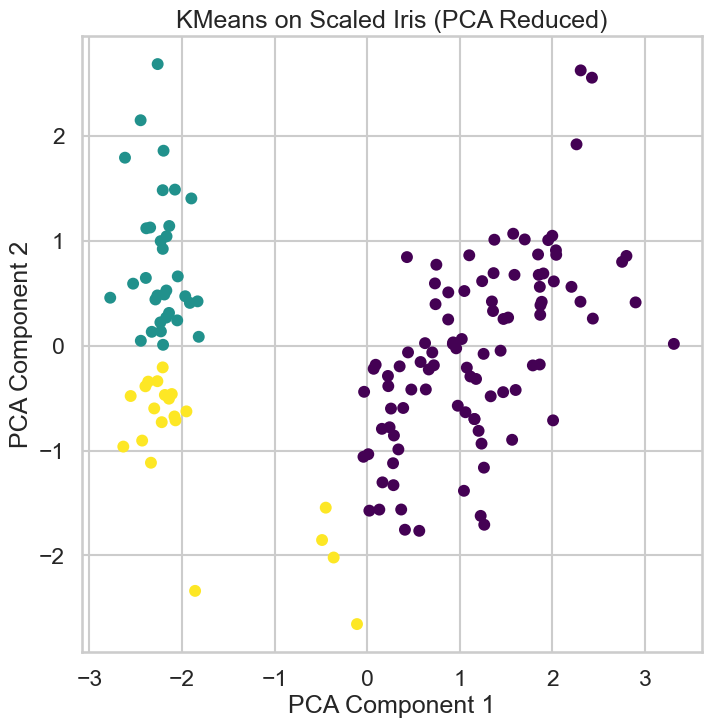

In [29]:
# KMeans on Iris
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_iris_pca)
labels_kmeans = kmeans.labels_
score_kmeans = silhouette_score(X_iris_pca, labels_kmeans)
print("KMeans Silhouette Score (Iris):", score_kmeans)

plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("KMeans on Scaled Iris (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [31]:
# Hierarchical Clustering on Iris
best_silhouette_hc_iris = -1
best_params_hc_iris = {}

for link in ['ward', 'complete', 'average']:
    for metric in ['euclidean', 'manhattan']:
        try:
            model = AgglomerativeClustering(n_clusters=3, linkage=link, metric=metric)
            labels = model.fit_predict(X_iris_pca)
            score = silhouette_score(X_iris_pca, labels)
            print(f"Linkage: {link},  Metric: {metric}, Silhouette Score: {score:.4f}")
            if score > best_silhouette_hc_iris:
                best_silhouette_hc_iris = score
                best_params_hc_iris = {'linkage': link, 'metric': metric}
        except ValueError:
            continue

print("Best Hierarchical Params (Iris):", best_params_hc_iris)
print("Best Silhouette Score (Iris):", best_silhouette_hc_iris)

Linkage: ward,  Metric: euclidean, Silhouette Score: 0.5111
Linkage: complete,  Metric: euclidean, Silhouette Score: 0.5046
Linkage: complete,  Metric: manhattan, Silhouette Score: 0.5041
Linkage: average,  Metric: euclidean, Silhouette Score: 0.5381
Linkage: average,  Metric: manhattan, Silhouette Score: 0.5152
Best Hierarchical Params (Iris): {'linkage': 'average', 'metric': 'euclidean'}
Best Silhouette Score (Iris): 0.5381235364065031


In [33]:
# DBSCAN on Iris
best_dbscan_score_iris = -1
best_dbscan_model_iris = None

for eps in np.arange(0.5, 3.1, 0.5):
    for min_samples in range(5, 26, 5):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_iris_pca)
        if len(np.unique(labels)) <= 1:
            continue
        score = silhouette_score(X_iris_pca, labels)
        if score > best_dbscan_score_iris:
            best_dbscan_score_iris = score
            best_dbscan_model_iris = model

print("Best DBSCAN Silhouette Score (Iris):", best_dbscan_score_iris)

Best DBSCAN Silhouette Score (Iris): 0.6145202036230452


## 3. Customer Dataset

In [3]:
# Load customer data
customer_data = pd.read_csv("Customerdata.csv")
X_customer = customer_data.drop(columns=['ID'])

# Scale features
scaler = StandardScaler()
X_customer_scaled = scaler.fit_transform(X_customer)

# Reduce dimensions
pca = PCA(n_components=2)
X_customer_pca = pca.fit_transform(X_customer_scaled)

In [5]:
# KMeans on Customer Data
best_silhouette_km_customer = -1
best_k_customer = 0

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_customer_scaled)
    score = silhouette_score(X_customer_scaled, labels)
    if score > best_silhouette_km_customer:
        best_silhouette_km_customer = score
        best_k_customer = k

print("Best KMeans Silhouette Score (Customer):", best_silhouette_km_customer)

Best KMeans Silhouette Score (Customer): 0.2814310651287284


In [9]:
# Hierarchical Clustering on Customer
best_silhouette_hc_customer = -1

for link in ['complete', 'average']:  # Ward only supports Euclidean
    for metric in ['euclidean', 'manhattan']:
        try:
            model = AgglomerativeClustering(n_clusters=5, linkage=link, metric=metric)
            labels = model.fit_predict(X_customer_scaled)
            score = silhouette_score(X_customer_scaled, labels)
            print(f"Hierarchical - Linkage: {link}, Metric: {metric}, Silhouette Score: {score:.4f}")
            
            if score > best_silhouette_hc_customer:
                best_silhouette_hc_customer = score
                best_params_hierarchical = {'linkage': link, 'metric': metric}
        except ValueError as e:
            print(f"Error with linkage={link}, metric={metric}: {e}")
            continue

print("Best Hierarchical Parameters:", best_params_hierarchical)
print("Best Hierarchical Silhouette Score:", best_silhouette_hc_customer)

Hierarchical - Linkage: complete, Metric: euclidean, Silhouette Score: 0.1838
Hierarchical - Linkage: complete, Metric: manhattan, Silhouette Score: 0.2429
Hierarchical - Linkage: average, Metric: euclidean, Silhouette Score: 0.2376
Hierarchical - Linkage: average, Metric: manhattan, Silhouette Score: 0.2415
Best Hierarchical Parameters: {'linkage': 'complete', 'metric': 'manhattan'}
Best Hierarchical Silhouette Score: 0.24286584117777058


In [11]:
# DBSCAN on Customer
best_dbscan_score_customer = -1

for eps in np.arange(0.5, 3.1, 0.5):
    for min_samples in range(5, 26, 5):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X_customer_scaled)
        if len(np.unique(labels)) <= 1:
            continue
        score = silhouette_score(X_customer_scaled, labels)
        if score > best_dbscan_score_customer:
            best_dbscan_score_customer = score

print("Best DBSCAN Silhouette Score (Customer):", best_dbscan_score_customer)

Best DBSCAN Silhouette Score (Customer): 0.41132269126085763


In [53]:
# Final comparison table
results = {
    "Method": [
        "KMeans", "Hierarchical", "DBSCAN",
        "KMeans", "Hierarchical", "DBSCAN",
        "KMeans", "Hierarchical", "DBSCAN"
    ],
    "Dataset": [
        "MultiBlob", "MultiBlob", "MultiBlob",
        "Iris", "Iris", "Iris",
        "Customer", "Customer", "Customer"
    ],
    "Silhouette Score": [
        max(silhouette_scores), best_silhouette_hc, best_dbscan_score,
        score_kmeans, best_silhouette_hc_iris, best_dbscan_score_iris,
        best_silhouette_km_customer, best_silhouette_hc_customer, best_dbscan_score_customer
    ]
}

result_df = pd.DataFrame(results)
print(result_df.to_string(index=False))

      Method   Dataset  Silhouette Score
      KMeans MultiBlob          0.486224
Hierarchical MultiBlob          0.468694
      DBSCAN MultiBlob          0.468521
      KMeans      Iris          0.522791
Hierarchical      Iris          0.538124
      DBSCAN      Iris          0.614520
      KMeans  Customer          0.281431
Hierarchical  Customer          0.242866
      DBSCAN  Customer          0.411323


## 4. Summary

### Best Performing Models:
- **KMeans** worked well when clusters were spherical.
- **DBSCAN** performed better with irregular shapes or noise.
- **Hierarchical** was good for visual interpretation.

### Effect of Scaling:
Scaling improved performance for KMeans and DBSCAN, which are sensitive to feature scales.